In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import explore as e

#These imports were constructed
from wrangle import wrangle_zillow, train_validate

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200


In [2]:
#Get data:
master_df = wrangle_zillow()

In [3]:
#Split data:
train, val, test = train_validate(master_df)

In [4]:
#Found schema on kaggle site
schema = pd.read_excel('zillow_data_dictionary.xlsx')
#schema
schema.loc[[4, 3, 11, 51, 50, 54, 17]]

,Feature,Description
4,'bedroomcnt',Number of bedrooms in home
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the home
51,'taxvaluedollarcnt',The total tax assessed value of the parcel
50,'yearbuilt',The Year the principal residence was built
54,'taxamount',The total property tax assessed for that assessment year
17,'fips',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details


# Explore

As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

## Real Question 1

1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [5]:
#Note: read about regplot: args deweight and regression line

In [6]:
train.columns

Index(['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'year_built', 'taxamount', 'fips'], dtype='object')

In [7]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
2045960,3.0,2.0,1191.0,388527.0,1956.0,4790.55,6037.0
1345346,3.0,2.0,1198.0,229705.0,1956.0,3543.05,6037.0
761422,6.0,3.0,2959.0,251184.0,1951.0,2850.76,6037.0
1667958,4.0,3.0,2644.0,525255.0,1990.0,6347.26,6059.0
564887,6.0,4.0,3243.0,174603.0,1972.0,2222.84,6059.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198531 entries, 2045960 to 934188
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1198531 non-null  float64
 1   bathrooms   1198531 non-null  float64
 2   sqft        1198531 non-null  float64
 3   tax_value   1198531 non-null  float64
 4   year_built  1198531 non-null  float64
 5   taxamount   1198531 non-null  float64
 6   fips        1198531 non-null  float64
dtypes: float64(7)
memory usage: 73.2 MB


In [9]:
#function inputs:
df = train
target = 'tax_value'
cont_columns = ['sqft', 'year_built', 'taxamount']
cat_columns = ['bedrooms', 'bathrooms', 'fips']
sample_size = 1000

def lmplot_cont(df, target, cont_columns, sample_size=500):

    """
    Plots continuous versus continuous variable with regression line.
    """

    for col in cont_columns:
        sns.lmplot(x=col, y=target, data=df.sample(sample_size),
        robust=True, scatter_kws = {'color':'gray'},
        line_kws = {'color':'blue'})

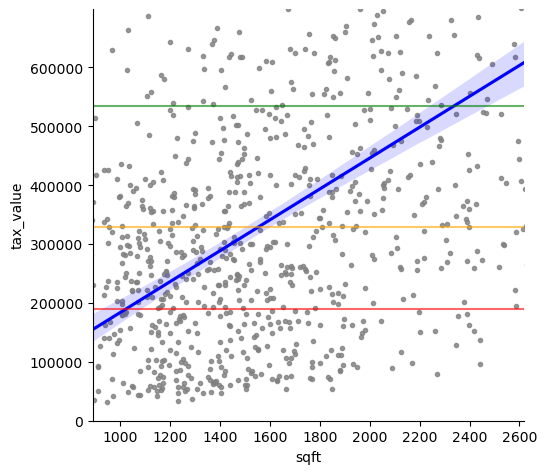

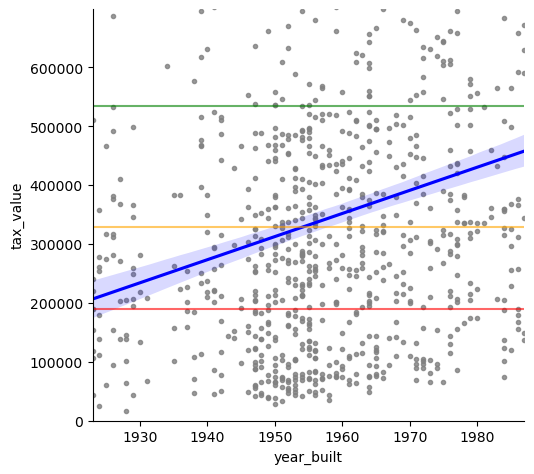

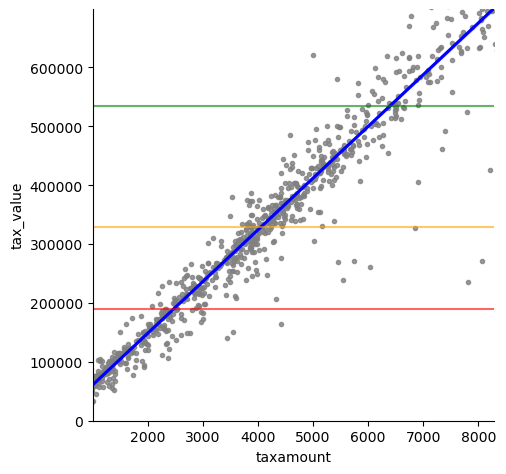

In [10]:
e.lmplot_cont(df, target, cont_columns, sample_size=1000)

## Real Question 2

2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- There are only two types of cahrts listed for plotting categorical and continuous variables
- Stipplot doesn't want to play today.


def cat_and_cont(df, target, cat_columns, quant_y_lim=0.85, sample_size=500):

    """
    This function takes in a DataFrame, 
    target column and list of categorical columns to plot.
    """

    for col in cat_columns:

        sns.swarmplot(x=col, y=target, data=df.sample(sample_size))
        plt.ylim(top=(df[target].quantile(q=quant_y_lim)), bottom=0)
        plt.show()
        
        sns.stripplot(x=col, y=target, data=df.sample(sample_size))
        plt.ylim(top=(df[target].quantile(q=quant_y_lim)), bottom=0)
        plt.show()

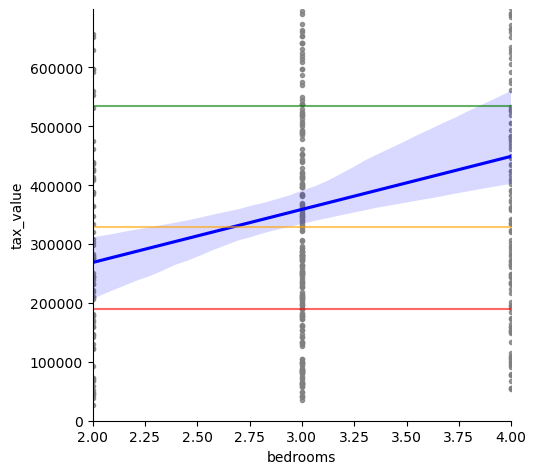

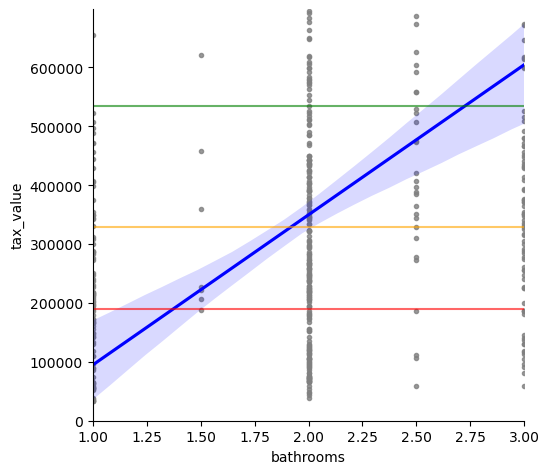

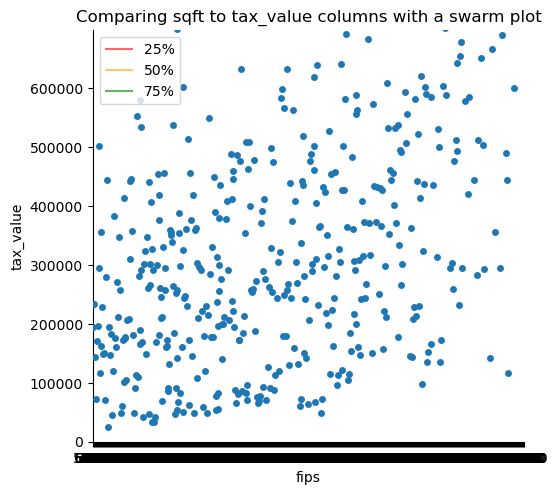

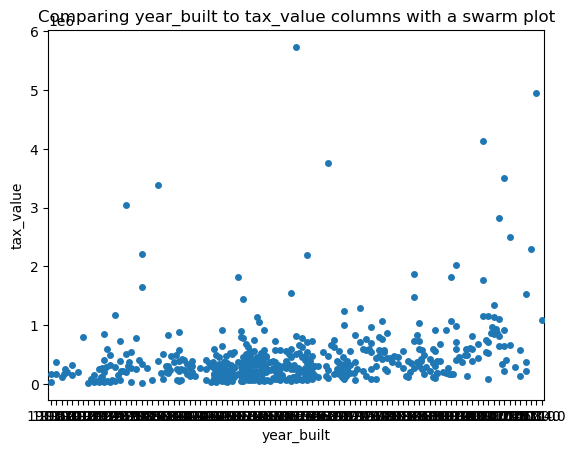

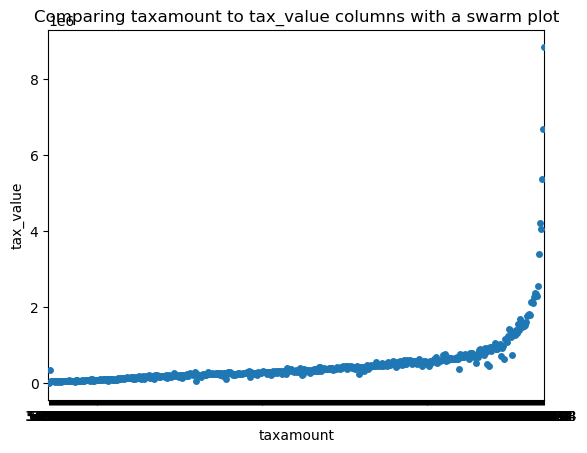

In [12]:
e.strip_swarm(df, target, cat_columns, cont_columns)

## Real Question 3

3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [13]:
e.finished_q3()

Real Question 3 complete. (Question 5 on the Codeup site.)


## Real Question 4

4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [14]:
#Done

## Real Question 5

5. Come up with some initial hypotheses based on your goal of predicting property value.

H_0: The main driver is square_feet.

H_0: Bedrooms and bathrooms add value to main driver.

H_0: Tax_amount is too highly correlated. Drop?

## Real Question 6

6. Visualize all combinations of variables in some way.

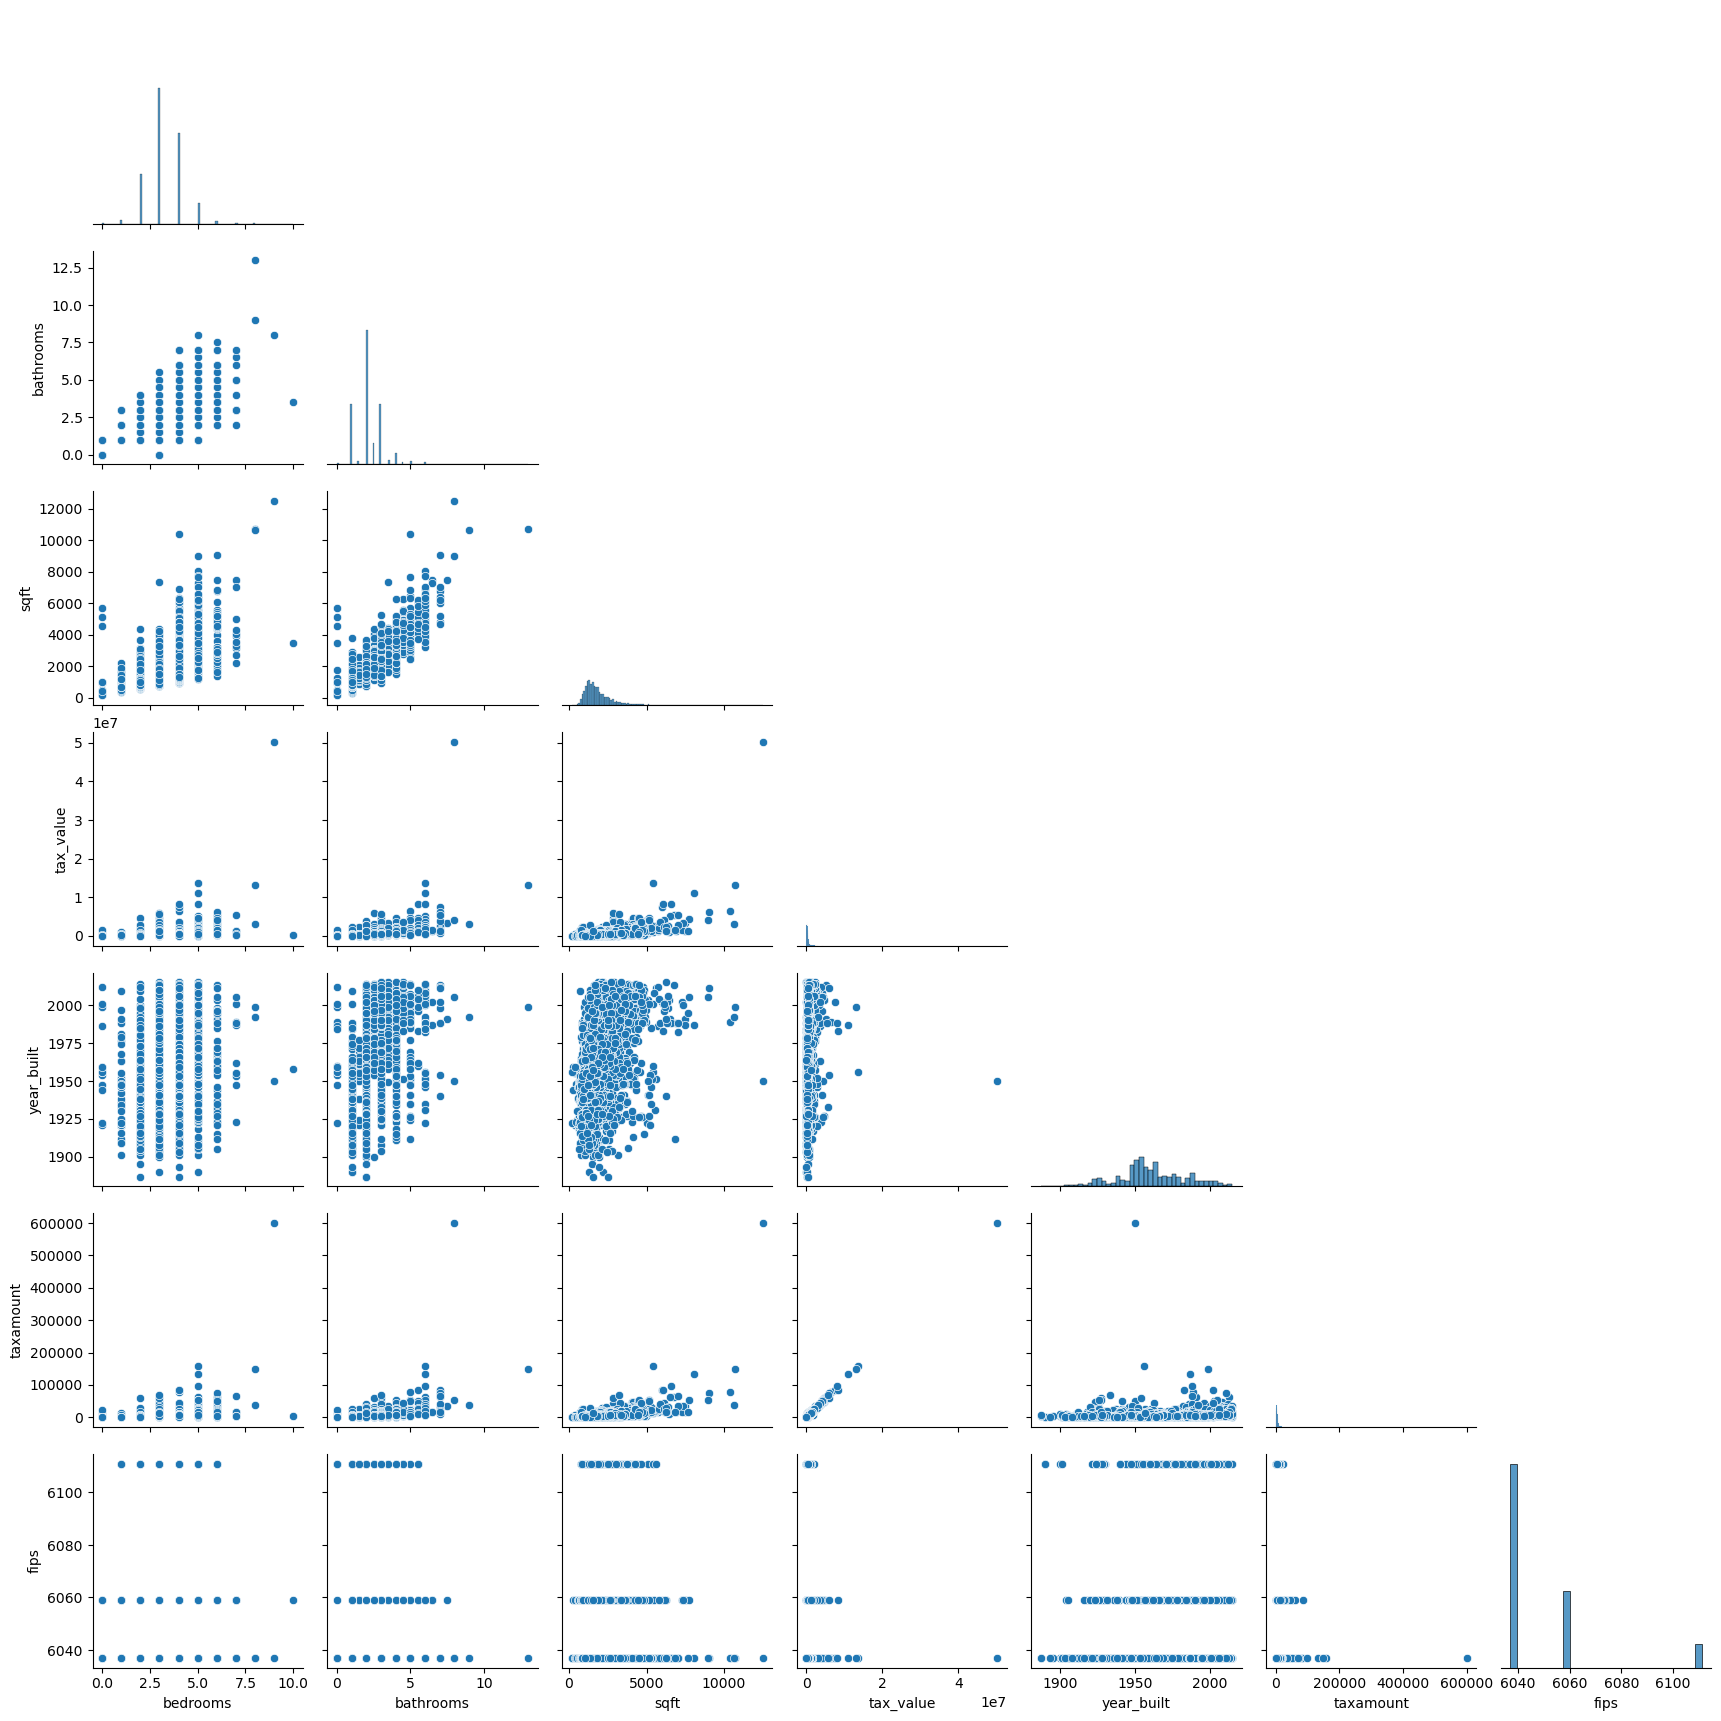

In [15]:
sns.pairplot(data=train.sample(5000), corner=True)

## Real Question 7

7. Run the appropriate statistical tests where needed.

In [16]:
train.corr(method='spearman').sort_values('tax_value', ascending=False)

,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
tax_value,0.296686,0.482813,0.523877,1.000000,0.291228,0.978726,0.151084
taxamount,0.298211,0.482601,0.521561,0.978726,0.290012,1.000000,0.086390
sqft,0.655845,0.826115,1.000000,0.523877,0.512210,0.521561,0.184528
bathrooms,0.634410,1.000000,0.826115,0.482813,0.570547,0.482601,0.184454
bedrooms,1.000000,0.634410,0.655845,0.296686,0.426205,0.298211,0.176497
year_built,0.426205,0.570547,0.512210,0.291228,1.000000,0.290012,0.412874
fips,0.176497,0.184454,0.184528,0.151084,0.412874,0.086390,1.000000


## Real Question 8

8. What independent variables are correlated with the dependent variable, home value?

- Tax amount is almost perfectly correlated. Probably drop.
- Square footage has a correlation of 0.52
- Bathrooms has a correlation of 0.48
- Both bedrooms and year_build are about 0.29
- FIPS is very low at 0.15

## Real Question 9

9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [17]:
train.corr(method='spearman').sort_values('tax_value', ascending=False)

,bedrooms,bathrooms,sqft,tax_value,year_built,taxamount,fips
tax_value,0.296686,0.482813,0.523877,1.000000,0.291228,0.978726,0.151084
taxamount,0.298211,0.482601,0.521561,0.978726,0.290012,1.000000,0.086390
sqft,0.655845,0.826115,1.000000,0.523877,0.512210,0.521561,0.184528
bathrooms,0.634410,1.000000,0.826115,0.482813,0.570547,0.482601,0.184454
bedrooms,1.000000,0.634410,0.655845,0.296686,0.426205,0.298211,0.176497
year_built,0.426205,0.570547,0.512210,0.291228,1.000000,0.290012,0.412874
fips,0.176497,0.184454,0.184528,0.151084,0.412874,0.086390,1.000000


tax_value to taxamount: 0.98

tax_value to sqft: 0.52

sqft to bathrooms: 0.83

sqft to bedrooms: 0.66

bedrooms to sqft: 0.66

bedrooms to bathrooms: 0.63

bathrooms to sqft: 0.83

bedrooms to bedrooms: 0.63

year_built to bathrooms: 0.57

year_built to sqft: 0.51

fips to year_built: 0.41

fips to sqft: 0.18

taxamount to tax_value: 0.98

taxamount to sqft: 0.52

## Real Question 10

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

10. Explore your dataset with any other visualizations you think will be helpful.

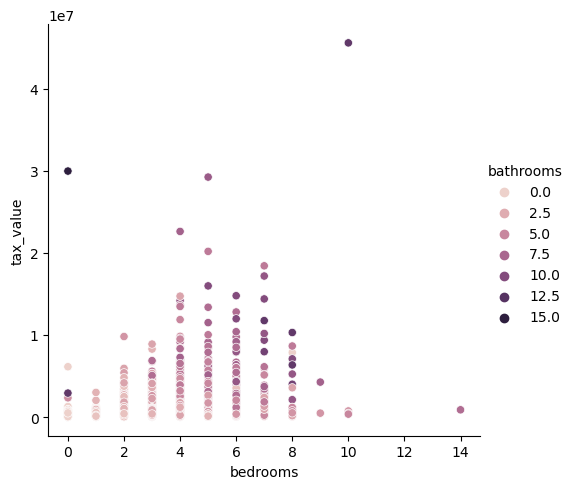

In [18]:
sns.relplot(data=train.sample(50000), x='bedrooms', y='tax_value', kind='scatter', hue='bathrooms')

This is interesting. I would think tax_value would rise with the number of bedrooms but it peaks around 6 and then decreases.
- Big gap between 12ish bedrooms and 25 bedrooms (25 bedroom place pops up every so often when sampled.)

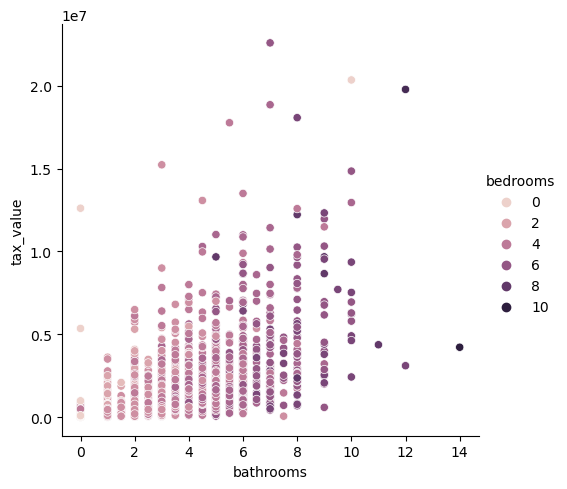

In [19]:
sns.relplot(data=train.sample(50000), x='bathrooms', y='tax_value', kind='scatter', hue='bedrooms')

In [20]:
#Function inputs:
sample_size=500

df = train.sample(sample_size)
target = 'tax_value'
cont_columns = ['sqft', 'year_built', 'taxamount']
cat_columns = ['bedrooms', 'bathrooms', 'fips'] 

quant_y_lim=0.85


"""
This function takes in a DataFrame, 
target column and list of categorical columns to plot.
"""
    

'\nThis function takes in a DataFrame, \ntarget column and list of categorical columns to plot.\n'

In [21]:
quantile = []
index = []
for item in df[target]:

    if item <= df[target].quantile(q=.25):
        quantile.append('<25%')
    elif item <= df[target].quantile(q=0.5):
        quantile.append('25-50%')
    elif item <= df[target].quantile(q=0.75):
        quantile.append('51-75%')
    else:
        quantile.append('>75%')

        

In [22]:
df['target_range'] = quantile

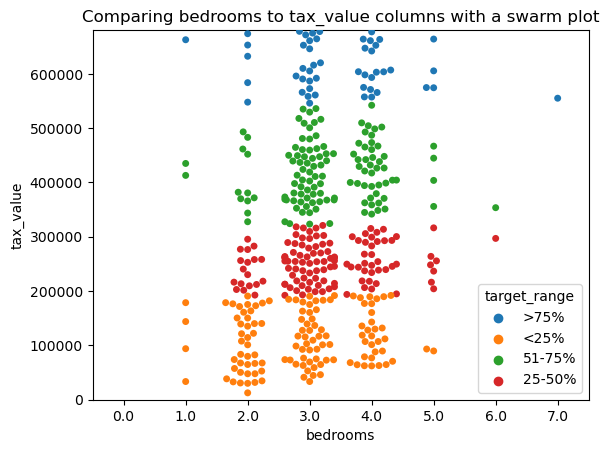

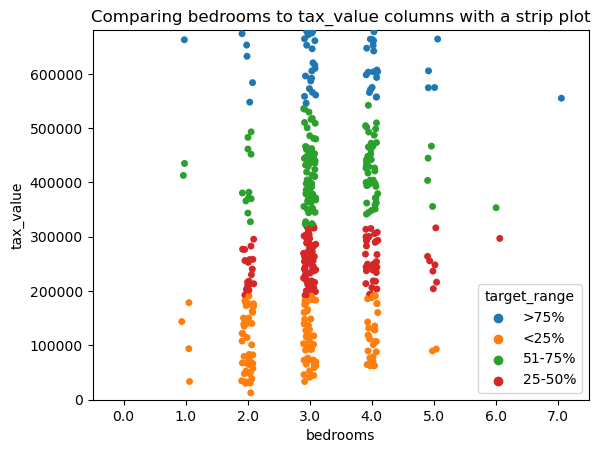

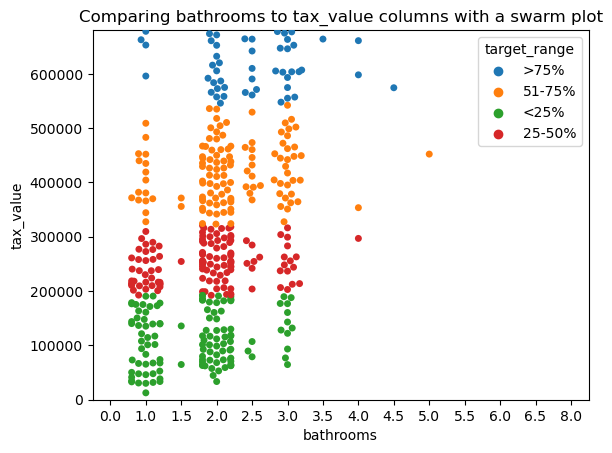

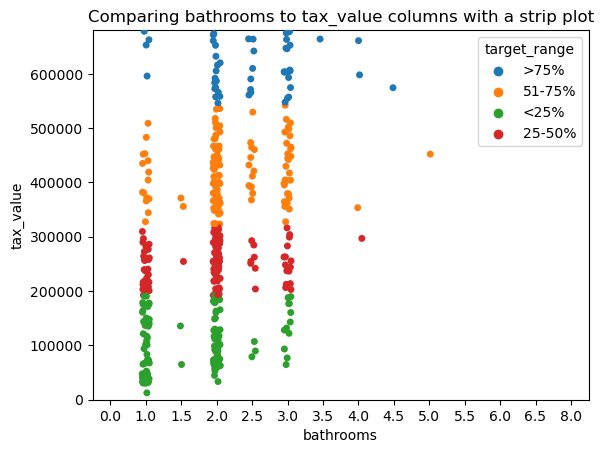

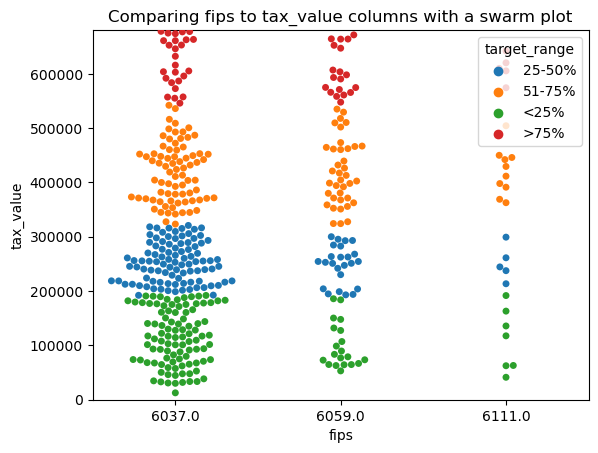

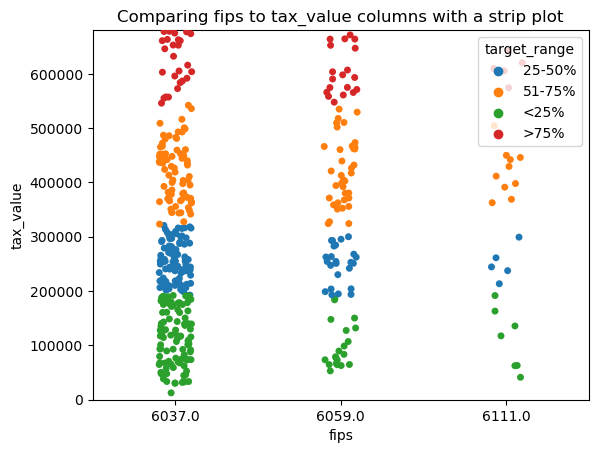

In [23]:
for col in cat_columns:

    sns.swarmplot(x=col, y=target, data=df.sample(sample_size), hue=df.target_range)
    plt.ylim(top=(df[target].quantile(q=quant_y_lim)), bottom=0)
    plt.title(f'Comparing {col} to {target} columns with a swarm plot')
    plt.show()

    sns.stripplot(x=col, y=target, data=df.sample(sample_size), hue=df.target_range)
    plt.ylim(top=(df[target].quantile(q=quant_y_lim)), bottom=0)
    plt.title(f'Comparing {col} to {target} columns with a strip plot')
    plt.show()